<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> SALES PRICING Regression model predictions 📈

</p>
</div>

###  Business problem : 
- The company is facing challenges in sales pricing of properties in a dynamic and competitive market
 setting the right prices for properties is crucial for attracting buyers and maximizing revenue 
 
### primary objective: 
- Build a regression models that can accuratley predict property-type features with the right **sales pricing**

### About dataset :
- This is a real estate dataset showing different property-types and their features 

In [22]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
#read data
df = pd.read_csv("Real_Estate_Sales_730_Days.csv")
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,...,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse
0,8347,7,16.0,278-816-169,938,0006,WETHERSFIELD AVE,236,NaN,654.00000,...,938 WETHERSFIELD AVE LLC,NaN,BROTHERS IN BLUE LLC,05/03/2022,176000,42100,07951-0127,25,10,CONDOMINIMUM
1,5053,4,11.0,229-649-035,55,NaN,CROWN ST,46,6960.0,2404.80001,...,LUNA,GUILLERMO,CORREA RANDY,08/05/2021,250000,233100,07806-0123,1,10,TWO FAMILY
2,4550,5,12.0,232-768-134,240,NaN,SOUTH ST,41,7500.0,3822.00000,...,ARAUJO,ROGER,PAZ DELIA M,02/07/2022,185000,200400,07905-0091,26,10,THREE FAMILY
3,18326,5,12.0,176-200-189,1045,NaN,ALBANY AVE,179,6700.0,3302.75000,...,BROOKS,CATHY,1047 ALBANY AVE LLC,05/12/2021,320000,49700,07764-0144,27,10,THREE FAMILY
4,6121,5,12.0,231-673-225,154,NaN,CAMPFIELD AVE,43,6150.0,3759.00000,...,ARTHUR,PETER,ARTHUR PETER L,12/17/2021,1,311300,07879-0115,5,8,THREE FAMILY


##### Data Wrangling

In [3]:
# fill up missing values with mode function
df["LandSF"]= df["LandSF"].fillna(df["LandSF"].mode()[0])
df["OwnerFirstName"]= df["OwnerFirstName"].fillna(df["OwnerFirstName"].mode()[0])
df["TotalFinishedArea"]= df["TotalFinishedArea"].fillna(df["TotalFinishedArea"].mode()[0])
df["LivingUnits"]= df["LivingUnits"].fillna(df["LivingUnits"].mode(),)
df["xrCompositeLandUseID"]= df["xrCompositeLandUseID"].fillna(df["xrCompositeLandUseID"].mode()[0])

In [4]:
# drop unnecessary data
df.drop(["PropertyID","ParcelID",
       "xrPrimaryNeighborhoodID",
        "LegalReference","ApartmentUnitNumber","LocationStartNumber" ,"SaleDate","xrCompositeLandUseID","xrBuildingTypeID",
       "LandSF",
        "xrSalesValidityID","LivingUnits","xrDeedID"],axis=1, inplace = True)

##### prepare data for modelling

In [5]:
# get your target variable
Features = df.drop(["SalePrice"],axis = 1 )
y= df["SalePrice"]

In [6]:
# get dummy variable
X = pd.get_dummies(Features, columns =["StreetNameAndWay","OwnerLastName","OwnerFirstName","PrimaryGrantor" ,"AssrLandUse"])

In [7]:
from sklearn .model_selection import train_test_split
#split data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

# Linear Regression model predictions

In [8]:
# import required libraries for building models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn import metrics
model=LinearRegression()
# fit the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get metric scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 141071.39306543526
MAPE is 2.1987976658734078e+20
MSE is 104186976232.97617
R2 score is 0.9956965583021354
RMSE score is 322780.07409531367


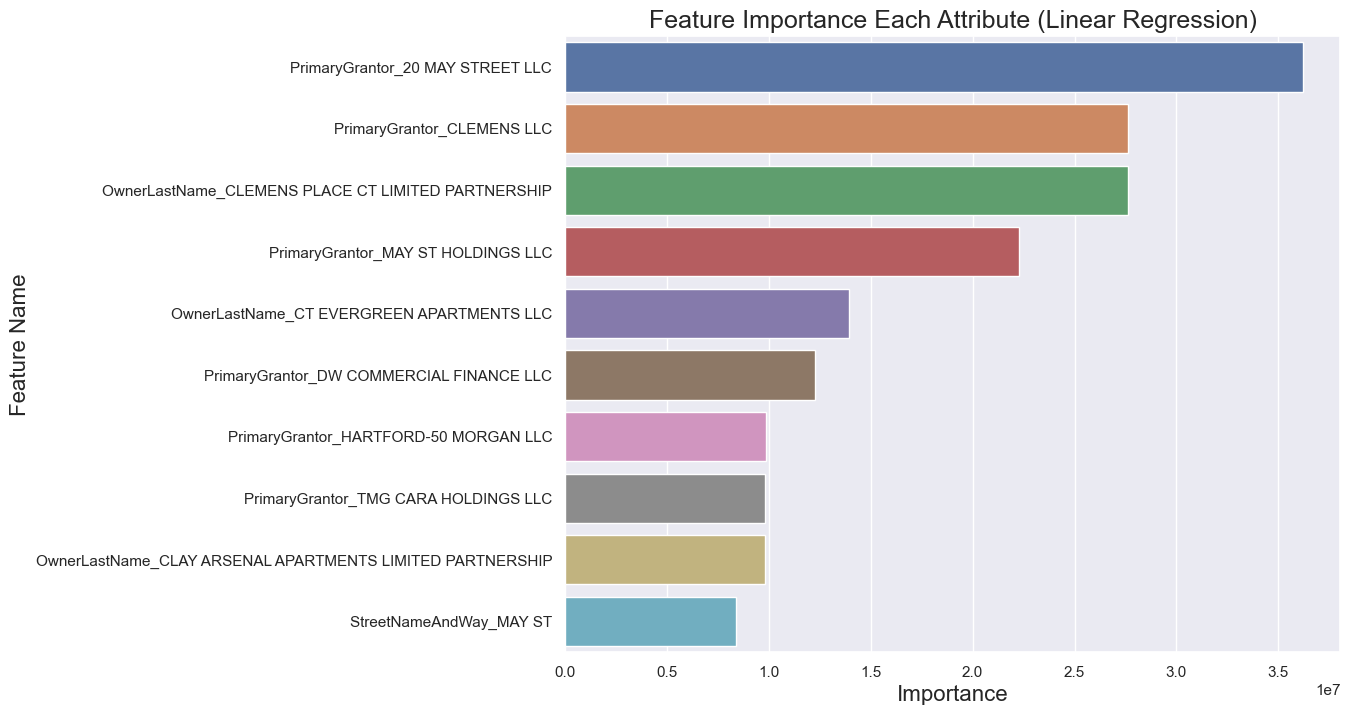

In [9]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": np.abs(model.coef_)

})

# Sort by importance (absolute value of coefficients)
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features

fi2 = fi.head(10)

# Plot the feature importance

plt.figure(figsize=(10, 8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attribute (Linear Regression)", fontsize=18)
plt.xlabel("Importance", fontsize=16)

plt.ylabel("Feature Name", fontsize=16)

plt.show()

# Decision Tree Model Regression Prediction

In [10]:
# import required libraries
from sklearn.tree import DecisionTreeRegressor
# get estmators
dtree = DecisionTreeRegressor(random_state=0, max_depth=None, max_features="auto", min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_features='auto', random_state=0)

In [14]:
DecisionTreeRegressor(max_features="auto", random_state=0)
from sklearn import metrics
import math

y_pred = dtree.predict(X_test)
#get scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

rmse = math.sqrt(mse)



print("MAE is {}".format(mae))
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse) )

MAE is 88261.93846780766
MSE is 20270434753.907703
R2 score is 0.9991627299562016
RMSE score is 142374.27700925368


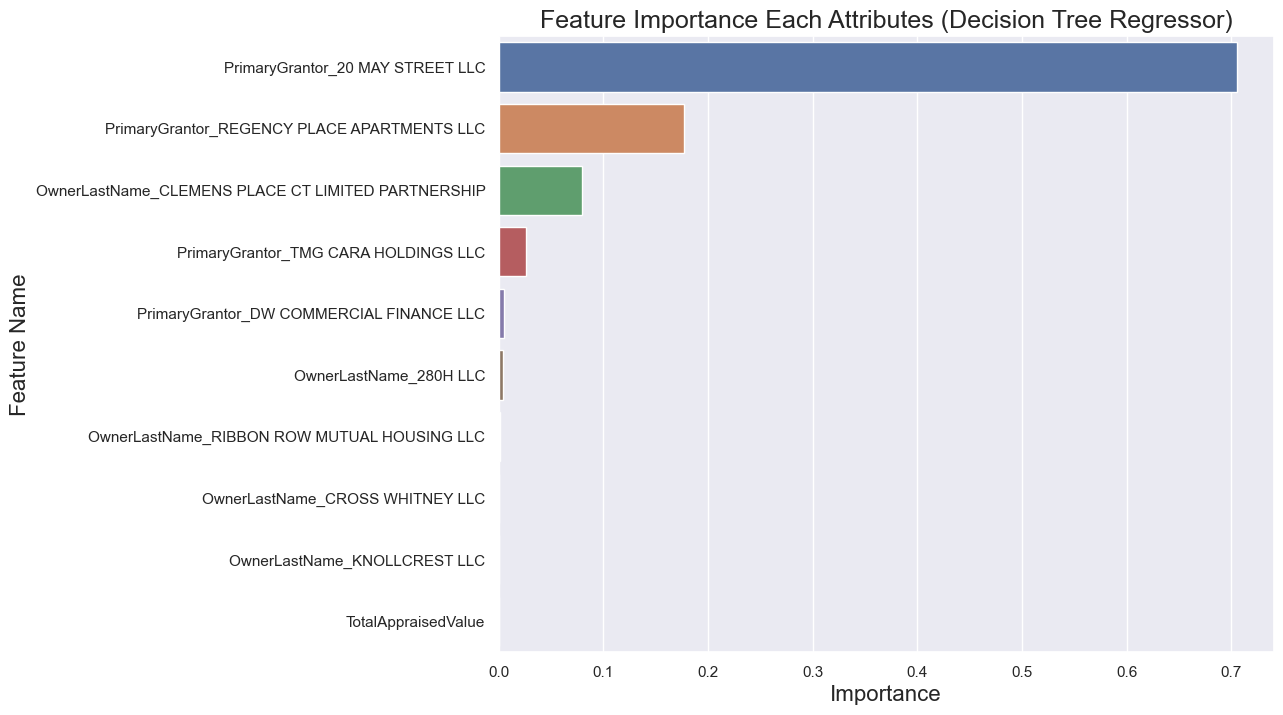

In [15]:
# plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": dtree.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Decision Tree Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

# Random Forest Regression Model Prediction

In [16]:
# import required libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
#fit model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [17]:
# import required libraries
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
# get metric score
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))


MAE is 94683.93599068577
MAPE is 1.209087419090642e+20
MSE is 119241587779.63048
R2 score is 0.9950747277680564
RMSE score is 345313.75266506616


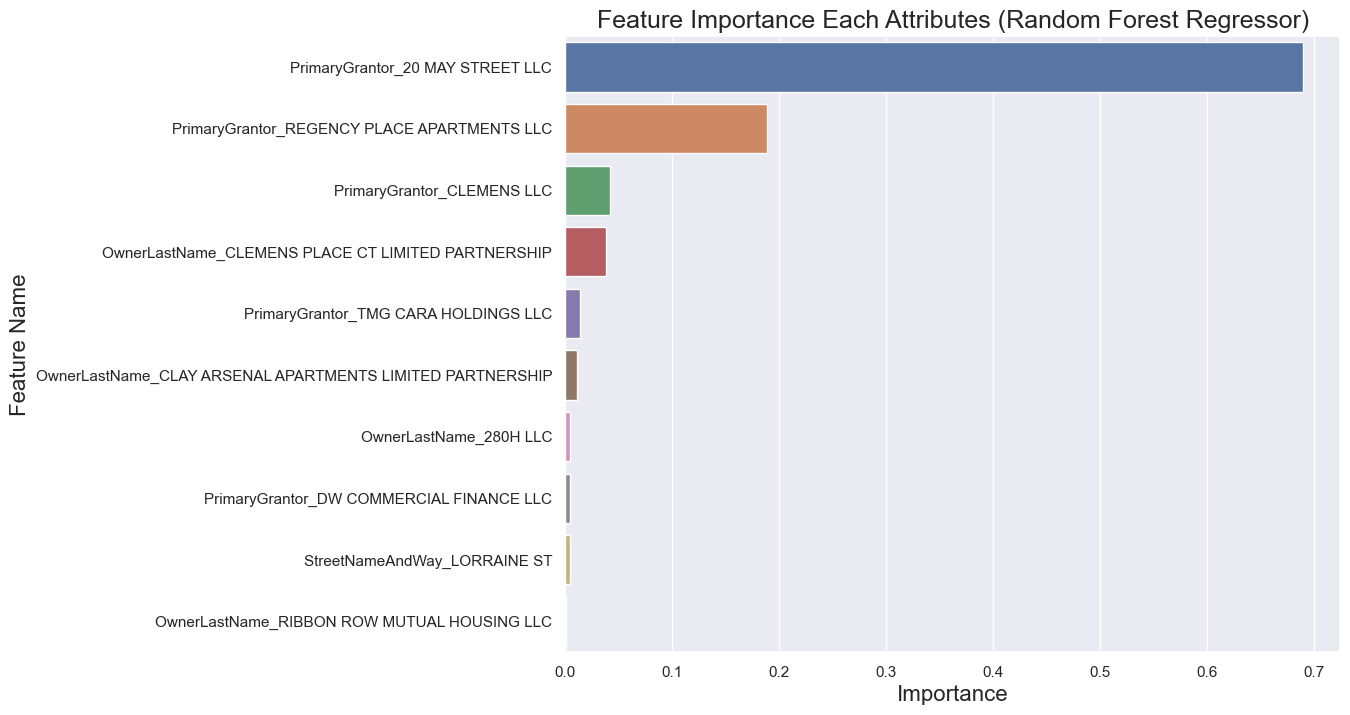

In [18]:
#plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": rf.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Random Forest Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

# Sales pricing prediction model Table 📃

In [19]:
X_test["sales_price Predictions"] = y_pred
df_sales=X_test
df_sales.head(10)

,TotalFinishedArea,TotalAppraisedValue,StreetNameAndWay_ACTON ST,StreetNameAndWay_ADAMS ST,StreetNameAndWay_ADDISON ST,StreetNameAndWay_ADELAIDE ST,StreetNameAndWay_AFFLECK ST,StreetNameAndWay_ALBANY AVE,StreetNameAndWay_ALDEN ST,StreetNameAndWay_ALLEN DR,...,PrimaryGrantor_ZUBAIR ADEBISI T.,AssrLandUse_APT CRDA,AssrLandUse_APT FOUR,AssrLandUse_CONDO GARAGE,AssrLandUse_CONDOMINIMUM,AssrLandUse_MULTI DWLG,AssrLandUse_ONE FAMILY,AssrLandUse_THREE FAMILY,AssrLandUse_TWO FAMILY,sales_price Predictions
944,1600.000,163900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,147389.10
3183,3957.625,356500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,326287.52
1695,695.000,52900,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,36533.00
1949,1560.000,249300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,97844.00
3381,1852.000,219100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,162182.03
3201,2780.000,210600,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,55629.55
3471,670.000,4400,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,92315.00
2953,1296.000,185000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,141421.01
3561,4287.375,283700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,123157.44
3077,880.000,59500,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10250144.00


- 👆 move slide bar to view predicted labels

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> End of SALES PRICING Regression Prediction📊
    </p>
</div>
    